In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

arr is coord: 
[[-2.+2.j -1.+2.j  0.+2.j  1.+2.j  2.+2.j]
 [-2.+1.j -1.+1.j  0.+1.j  1.+1.j  2.+1.j]
 [-2.+0.j -1.+0.j  0.+0.j  1.+0.j  2.+0.j]
 [-2.-1.j -1.-1.j  0.-1.j  1.-1.j  2.-1.j]
 [-2.-2.j -1.-2.j  0.-2.j  1.-2.j  2.-2.j]]

arr2 is block dist:
[[4. 3. 2. 3. 4.]
 [3. 2. 1. 2. 3.]
 [2. 1. 0. 1. 2.]
 [3. 2. 1. 2. 3.]
 [4. 3. 2. 3. 4.]]


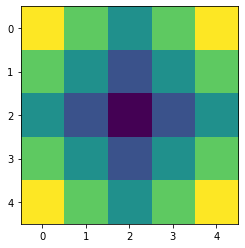

arr3 is N:
[[4. 8. 8. 8. 4.]
 [8. 8. 4. 8. 8.]
 [8. 4. 1. 4. 8.]
 [8. 8. 4. 8. 8.]
 [4. 8. 8. 8. 4.]]


In [51]:
# generate general matrix 

m = 2

n = 2*m + 1

arr = np.zeros((n,n),dtype=complex)

u = int( (n-1)/2 )

for j,valj in enumerate(range(u,-u-1,-1)):

    for i,vali in enumerate(range(-u,u+1)):
        
        arr[j,i]=complex(vali,valj)

print("arr is coord: ")
        
print(arr)



# set values

arr2 = np.zeros((n,n))

for j in range(arr.shape[0]):
    
    for i in range(arr.shape[1]):
        
        arr2[j,i] = abs(np.real(arr[j,i]))+abs(np.imag(arr[j,i]))
   
print("\narr2 is block dist:")

print(arr2) # arr2 is block dist

plt.imshow(arr2);plt.show();



arr3 = np.zeros((n,n))

for j in range(arr.shape[0]):
    
    for i in range(arr.shape[1]):
        
        arr3[j,i] = np.sum(arr2==arr2[j,i])   
        
print("arr3 is N:")

print(arr3) # arr3 is N

In [52]:
# calculate N ( N is [N0,N1,N2,...,Nn] )

N = np.zeros(n)

for i in range(n):
    
    N[i] = arr3[arr2==i][0]
    
print(f'N is {N}\n')
    
# calculate L0

denom = 1

sum_ = 0

for i in range(n):
    
    denom = 1
    
    for j in range(i+1):
        
        denom *= N[j]
    
    sum_ += N[i] / denom 

L_0 = 1/sum_

print(f'L0 is {L_0}\n')

# calculate L ( L is [L0,L1,L2,...,Ln] )

L = np.zeros(n)

L[0] = L_0

for i in range(1,n):

    denom = 1
    
    for j in range(i+1):
        
        denom *= N[j]
    
    L[i] = L[0]/denom

print(f'L is {L}\n')


N is [1. 4. 8. 8. 4.]

L0 is 0.4376068376068376

L is [4.37606838e-01 1.09401709e-01 1.36752137e-02 1.70940171e-03
 4.27350427e-04]



In [53]:
arr4 = np.zeros((n,n))

for j in range(arr.shape[0]):
    
    for i in range(arr.shape[1]):
        
        arr4[j,i] = L[int(arr2[j,i])]
    
print(arr4)

[[4.27350427e-04 1.70940171e-03 1.36752137e-02 1.70940171e-03
  4.27350427e-04]
 [1.70940171e-03 1.36752137e-02 1.09401709e-01 1.36752137e-02
  1.70940171e-03]
 [1.36752137e-02 1.09401709e-01 4.37606838e-01 1.09401709e-01
  1.36752137e-02]
 [1.70940171e-03 1.36752137e-02 1.09401709e-01 1.36752137e-02
  1.70940171e-03]
 [4.27350427e-04 1.70940171e-03 1.36752137e-02 1.70940171e-03
  4.27350427e-04]]


L0 is 0.4376068376068376
L is [4.37606838e-01 1.09401709e-01 1.36752137e-02 1.70940171e-03
 4.27350427e-04]
[[4.27350427e-04 1.70940171e-03 1.36752137e-02 1.70940171e-03
  4.27350427e-04]
 [1.70940171e-03 1.36752137e-02 1.09401709e-01 1.36752137e-02
  1.70940171e-03]
 [1.36752137e-02 1.09401709e-01 4.37606838e-01 1.09401709e-01
  1.36752137e-02]
 [1.70940171e-03 1.36752137e-02 1.09401709e-01 1.36752137e-02
  1.70940171e-03]
 [4.27350427e-04 1.70940171e-03 1.36752137e-02 1.70940171e-03
  4.27350427e-04]]


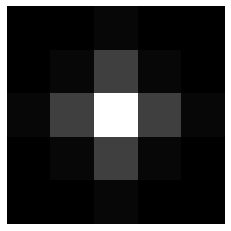

In [71]:
#####################################################################################
#########################################  ##########################################
####################################            #####################################
#################################    FINAL CODE    ##################################
####################################            #####################################
#########################################  ##########################################
#####################################################################################

# All in one cell


# generate general matrix 

m = 2
n = 2*m + 1

arr = np.zeros((n,n),dtype=complex)
u = int( (n-1)/2 )

# generate general matrix with coordination 
for j,valj in enumerate(range(u,-u-1,-1)):
    for i,vali in enumerate(range(-u,u+1)):
        arr[j,i]=complex(vali,valj)

# calculate City block distance for each cell 
arr2 = np.zeros((n,n))
arr2 = abs(np.real(arr))+abs(np.imag(arr))
        
# calculate repeat of each cell
arr3 = np.zeros((n,n))
for j in range(arr.shape[0]):
    for i in range(arr.shape[1]):
        arr3[j,i] = np.sum(arr2==arr2[j,i])   
        
#print(arr3) # arr3 is N
#print(arr2) # arr2 is block

# calculate N  (N is [N0,N1,N2,...,Nn])
N = np.zeros(n)
for i in range(n):
    N[i] = arr3[arr2==i][0]

# calculate L0
denom = 1
sum_ = 0
for i in range(n):
    denom = 1
    for j in range(i+1):
        denom *= N[j]
    sum_ += N[i] / denom 

L_0 = 1/sum_
print(f'L0 is {L_0}')

# calculate L (L is [L0,L1,L2,...,Ln])
L = np.zeros(n)
L[0] = L_0
for i in range(1,n):
    denom = 1
    for j in range(i+1):
        denom *= N[j]
    L[i] = L[0]/denom
print(f'L is {L}')

# calculate final value for each cell
arr4 = np.zeros((n,n))
for j in range(arr.shape[0]):
    for i in range(arr.shape[1]):
        arr4[j,i] = L[int(arr2[j,i])]
        
print(arr4)
plt.imshow(arr4, cmap='gray');plt.axis('off');plt.show();

3x3: L_0 is: 0.4444444444444444
5x5: L_0 is: 0.4376068376068376
7x7: L_0 is: 0.43780952720276484
9x9: L_0 is: 0.43782299370724653
11x11: L_0 is: 0.43782348317849246
13x13: L_0 is: 0.43782349865724274
15x15: L_0 is: 0.43782349910226626
17x17: L_0 is: 0.437823499113917
19x19: L_0 is: 0.43782349911419555
21x21: L_0 is: 0.43782349911420176
23x23: L_0 is: 0.43782349911420193
25x25: L_0 is: 0.43782349911420193
27x27: L_0 is: 0.43782349911420193
29x29: L_0 is: 0.43782349911420193
31x31: L_0 is: 0.43782349911420193
33x33: L_0 is: 0.43782349911420193


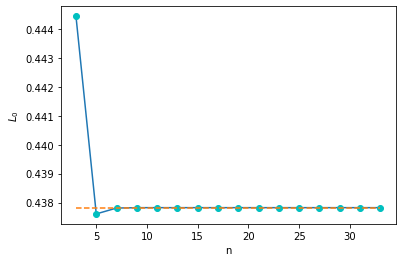

In [72]:
L_0 = []
x = range(3,34,2)
for n in x:

    arr = np.zeros((n,n),dtype=complex)
    u = int( (n-1)/2 )

    # generate general matrix with coordination 
    for j,valj in enumerate(range(u,-u-1,-1)):
        for i,vali in enumerate(range(-u,u+1)):
            arr[j,i]=complex(vali,valj)

    # calculate City block distance for each cell 
    arr2 = np.zeros((n,n))
    arr2 = abs(np.real(arr))+abs(np.imag(arr))

    # calculate repeat of each cell
    arr3 = np.zeros((n,n))
    for j in range(arr.shape[0]):
        for i in range(arr.shape[1]):
            arr3[j,i] = np.sum(arr2==arr2[j,i])   

    #print(arr3) # arr3 is N
    #print(arr2) # arr2 is block

    # calculate N  (N is [N0,N1,N2,...,Nn])
    N = np.zeros(n)
    for i in range(n):
        N[i] = arr3[arr2==i][0]

    # calculate L0
    denom = 1
    sum_ = 0
    for i in range(n):
        denom = 1
        for j in range(i+1):
            denom *= N[j]
        sum_ += N[i] / denom 

    L_0i = 1/sum_
    L_0.append(L_0i)
    print(f"{n}x{n}: L_0 is: {L_0i}")
    
plt.plot(x, L_0)
plt.plot(x, L_0,'oc')
plt.plot(x, [1/(1+np.exp(.25))]*len(x),'--')
plt.xlabel('n'); plt.ylabel('$L_0$')
plt.show()

In [73]:
def convolution2d(image, kernel, stride=1, padding=0):
    image = np.pad(image, [(padding, padding), (padding, padding)], mode='constant', constant_values=0)

    kernel_height, kernel_width = kernel.shape
    padded_height, padded_width = image.shape

    output_height = (padded_height - kernel_height) // stride + 1
    output_width = (padded_width - kernel_width) // stride + 1

    new_image = np.zeros((output_height, output_width)).astype(np.float32)

    for y in range(0, output_height):
        for x in range(0, output_width):
            new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
    
    return new_image

noise 1 = 2.167661428451538
noise 2 = 2.0044310092926025


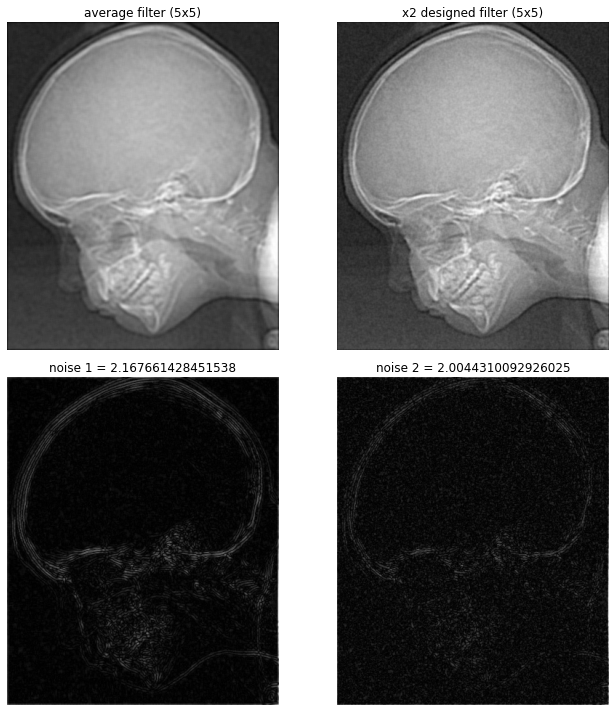

In [74]:
# load and process images
image = cv2.imread("ctskull.png", flags=cv2.IMREAD_GRAYSCALE)
size = 5 # n must be 5 (above)

kernel = np.ones((size,size))/size**2
res = convolution2d(image, kernel, stride=1, padding=2)

# remeber to set m=2(or n=5). why? here size of kernel should be 5 
kernel = arr4
res2 = convolution2d(image, kernel, stride=1, padding=2)
res2 = convolution2d(res2, kernel, stride=1, padding=2)

org_image = cv2.imread("ctskull_org.png", flags=cv2.IMREAD_GRAYSCALE)

noise = np.abs(org_image-res)
noise2 = np.abs(org_image-res2)

noise_val = np.sqrt(np.mean(noise))
noise2_val = np.sqrt(np.mean(noise2))
print(f'noise 1 = {noise_val}') # x1 avg
print(f'noise 2 = {noise2_val}') # x2 arr3

fig,ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].imshow(res, cmap='gray'); 
ax[0,0].title.set_text('average filter (5x5)')
ax[0,1].imshow(res2, cmap='gray');
ax[0,1].title.set_text('x2 designed filter (5x5)')
ax[1,0].imshow(noise, cmap='gray');
ax[1,0].title.set_text(f'noise 1 = {noise_val}')
ax[1,1].imshow(noise2, cmap='gray');
ax[1,1].title.set_text(f'noise 2 = {noise2_val}')

for axi in ax.ravel(): axi.axis('off')
plt.tight_layout()
plt.show();